# MSiA 400 - Final Project
## INITITAL EDA: SKUINFO & DEPTINFO Tables
### Team 12: Alejandra Lelo de Larrea Ibarra, Xin Shu, Yi Chen, Yiqing Chen

This file shows our EDA for the SKUINFO & DEPTINFO tables on the original dataset (i.e. before cleaning).

NOTE: To upload the data into Postgress database, we did some cleanning directly on the terminal. See *Clean_SKUINFO_TRNSACT* file for the corresponding code.

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import psycopg2
from psycopg2 import Error
from wordcloud import WordCloud

In [2]:
# --- Variables on File---

# Connection to db 
USER = "YOUR USER HERE"
PSWD = "YOUR PASSWORD HERE"
HOST = "pg.analytics.northwestern.edu"
PORT = "5432"
DB_NAME = "2022-everything-team12"

### Connect to database

In [3]:
# Connect to postgress database
try:
    # Connect to an existing database
    connection = psycopg2.connect(user = USER,
                                  password = PSWD,
                                  host = HOST,
                                  port = PORT,
                                  database = DB_NAME)

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    
    # Fetch result
    record = cursor.fetchone()
    
    # Print succesfull connection
    print("You are connected to - ", record, "\n")
    
except (Exception, Error) as error:
    # Print error conecting to ostgres
    print("Error while connecting to PostgreSQL", error)

You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



In [4]:
# Read DEPTINFO table
dept = pd.read_sql("select * from \"DEPTINFO\"", connection);

# Read SKUINFO table
sku = pd.read_sql("select * from \"SKUINFO\"", connection);

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
# Close connection to db
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 

PostgreSQL connection is closed


### Analyzing SKUINFO and DEPTINFO Tables

#### DEPT

In [6]:
# Head and tail of dept table
dept

,DEPT,DEPTDESC,EXTRA_COL
0,800,CLINIQUE,0
1,801,LESLIE,0
2,1100,GARY F,0
3,1107,JACQUES,0
4,1202,CABERN,0
5,1301,BE2,0
6,1704,R LAUREN,0
7,1905,R & Y,0
8,2102,CAB,0
9,2105,R TAYLOR,0


In [7]:
# Check dimensions of the table
dept.shape

(60, 3)

#### Merge DEPTINFO and SKUINFO

The DEPTINFO table has 60 different departments and it only contains the department identifier and its description. Therefore, by itself this table is not very informative. Lets merge the SKUINFO and the DEPTINFO tables to have a more interesting view of the data. 

In [8]:
# Merge skuinfo and deptinfo tables
df = pd.merge(sku, dept)
df

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA_COL,DEPTDESC
0,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY,0,ST JOHN
1,466,6505,511,400000466000,10 F55KR5,TRUEBURGUNDY,XL,1,4259203,ROUNDTRE,0,ST JOHN
2,1211,6505,113,400001211000,92 F55KR9,OATMEALHTHER,XL,1,4259203,ROUNDTRE,0,ST JOHN
3,1302,6505,203,400001302000,6 115K83,STRETCH LIMO,S,1,5119207,ROUNDTRE,0,ST JOHN
4,1568,6505,127,400001568000,00 S65KR4,COPPER TAN,XL,1,7679205,ROUNDTRE,0,ST JOHN
...,...,...,...,...,...,...,...,...,...,...,...,...
1346351,9637469,4400,007,400007469963,40 BA3003,HOLIDAY SE,U,3,6011254,LIZ CLAI,0,BORA
1346352,9723206,4400,006,400003206972,791868,JAN S04GWP,S04 GWP,6,6011254,LIZ CLAI,0,BORA
1346353,9843436,4400,007,400003436984,520184,SUMMER SET,CURVE,1,6011254,LIZ CLAI,0,BORA
1346354,9857469,4400,007,400007469985,844232,HOLIDAY SE,U,3,6011254,LIZ CLAI,0,BORA


In [9]:
# CHeck dimensions of the table
print('The dimension of the dataframe is')
print(df.shape)

The dimension of the dataframe is
(1346356, 12)


In [10]:
# Check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346356 entries, 0 to 1346355
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   SKU        1346356 non-null  int64 
 1   DEPT       1346356 non-null  int64 
 2   CLASSID    1346356 non-null  object
 3   UPC        1346356 non-null  object
 4   STYLE      1346356 non-null  object
 5   COLOR      1346356 non-null  object
 6   SIZE       1346356 non-null  object
 7   PACKSIZE   1346356 non-null  int64 
 8   VENDOR     1346356 non-null  int64 
 9   BRAND      1346356 non-null  object
 10  EXTRA_COL  1346356 non-null  int64 
 11  DEPTDESC   1346356 non-null  object
dtypes: int64(5), object(7)
memory usage: 133.5+ MB


In [11]:
# Check percentage of missing values per column
df.isnull().sum()/df.shape[0]*100

SKU          0.0
DEPT         0.0
CLASSID      0.0
UPC          0.0
STYLE        0.0
COLOR        0.0
SIZE         0.0
PACKSIZE     0.0
VENDOR       0.0
BRAND        0.0
EXTRA_COL    0.0
DEPTDESC     0.0
dtype: float64

We have no missing values in the dataframe. The primary key is the id for every SKU. We have the additional column that, without more context is not useful. 

#### CLASSID

            SKU
CLASSID        
002      142392
006      107995
001       67835
005       53532
004       44413
...         ...
F27           1
776           1
764           1
586           1
367           1

[1028 rows x 1 columns]

Number of different class id's: 1028


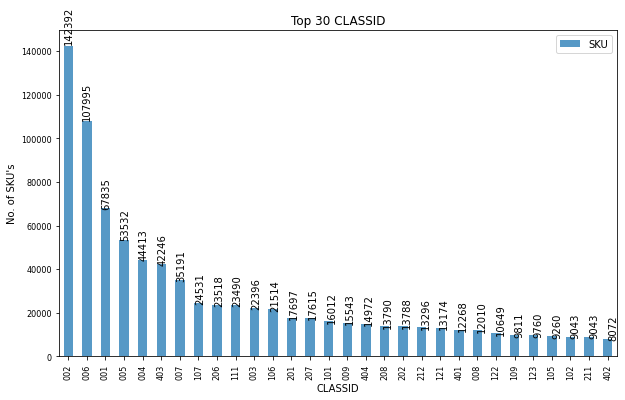

In [63]:
# Check values for classid (stock item classification)
classid_count = pd.pivot_table(df, 
                               values = 'SKU', 
                               index = 'CLASSID', 
                               aggfunc = 'count').sort_values('SKU', ascending = False)
print(classid_count)

# Number of different class id's 
print("\nNumber of different class id's: " + str(classid_count.shape[0]))

# Bar plot TOP 30 classid's 
ax = classid_count.head(30).plot(kind = 'bar', rot = 90, fontsize = 8, 
                             alpha = 0.75, figsize = (10,6))
plt.title("Top 30 CLASSID")
plt.xlabel("CLASSID")
plt.ylabel("No. of SKU's")

# Add counts on top of bars

for i in ax.patches:
    ax.annotate(str(i.get_height()), 
               (i.get_x()*1.01, i.get_height()*1.01), rotation = 90)

# print plot
plt.show()

The class with more SKU's is 002, followed by 006, 001, 005 and 004. It would be interesting to have a classid catalogue to get a sense of which articles are the most popular in Dillard's. 

#### UPC

In [56]:
# Check values for UPC (universal product code)
upc_count = pd.pivot_table(df, 
                               values = 'SKU', 
                               index = 'UPC', 
                               aggfunc = 'count').sort_values('SKU', ascending = False)
print(upc_count)

# Number of different UPC id's 
print("\nNumber of different UPC id's: " + str(upc_count.shape[0]))


              SKU
UPC              
400000000612    1
400007324157    1
400007324155    1
400007324153    1
400007324152    1
...           ...
400002168090    1
400002168089    1
400002168079    1
400002168077    1
400009999998    1

[1346356 rows x 1 columns]

Number of different UPC id's: 1346356


The UPC is a unique product code. We have one UPC associated to each SKU, thus this variable should be discarded. 

#### Style

              SKU
STYLE            
70    S55KR9  340
      D2220   282
      10881   280
      D2221   279
00    Y55KR0  270
...           ...
6     7002-9    1
6     7000-B    1
6     690814    1
-BRN  PH148E    1
28    JWRU50    1

[306974 rows x 1 columns]

Number of different styles: 306974


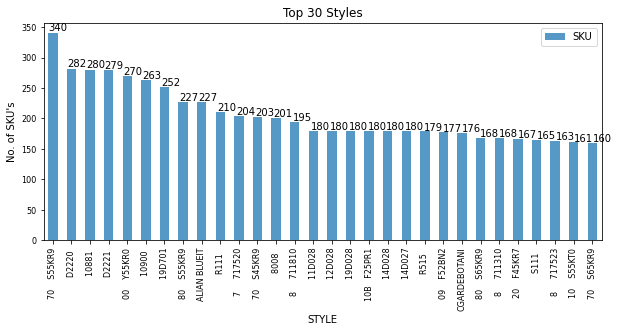

In [55]:
# Check values for Style
style_count = pd.pivot_table(df, 
                               values = 'SKU', 
                               index = 'STYLE', 
                               aggfunc = 'count').sort_values('SKU', ascending = False)
print(style_count)

# Number of different UPC id's 
print("\nNumber of different styles: " + str(style_count.shape[0]))

# Bar plot TOP 30 Styles's 
ax = style_count.head(30).plot(kind = 'bar', rot = 90, fontsize = 8, 
                             alpha = 0.75, figsize = (10,4))
# Customize plot
plt.title("Top 30 Styles")
plt.xlabel("STYLE")
plt.ylabel("No. of SKU's")

# Add counts on top of bars

for i in ax.patches:
    ax.annotate(str(i.get_height()), 
               (i.get_x()*1.01, i.get_height()*1.01))

# print plot
plt.show()

The most popular style among Dillard's SKUs is 70 S55Kr9. Without more information on the style, we can not sense which SKU's are associated to the most popular styles or if products could be groud on this variable. 

#### COLOR

In [44]:
# Number of different colors 
print("\nNumber of different colors: " + str(len(df.COLOR.unique())))



Number of different colors: 68523


There are 68,523 different colors in the data set. This was one of the variables in the original file that was causing trouble to upload the data into Postgress since many entries involved a comma. Even though an initial cleaning was made to be able to load the data into the database, this seem too many colors. Lets take a look at the word cloud to see which are the most popular colors and if there are evident ''errors'' that need to be fixed. 

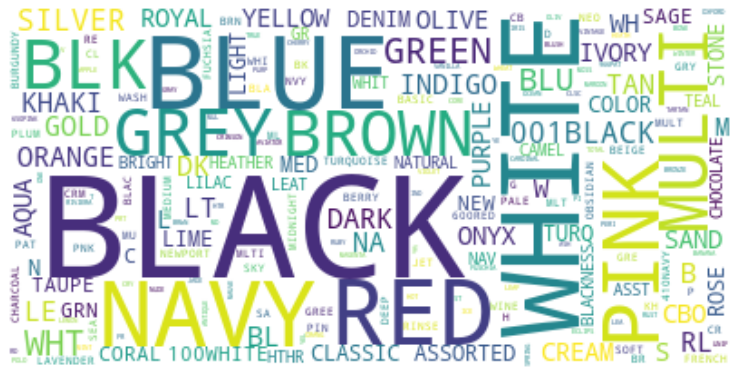

In [115]:
# Replace white spaces for underscore
text = df['COLOR'].str.replace(r' ', '_', regex=True).str.replace(r'_$','',regex=True)

# Create a single string with the color column
text = " ".join(cat for cat in df.COLOR)

# Create wordcloud
color_wc = WordCloud(collocations = False, 
                     background_color = 'white',
                    normalize_plurals = False).generate(text)

# print wordcloud
figure(figsize = (20, 6), dpi = 80)
plt.imshow(color_wc, interpolation='bilinear')
plt.axis("off")
plt.show()


From the wordcloud we can see that the most popular colors for the products are black, white, blue, red, navy, pink, grey, green, and multi. 

We can also detect that further cleaning is needed if this variable will be used in the modelling part. For example, for the black color we can find "black", "blk", "blac", "001black" and all of these must be marked as "black". 

Additionally, there are other words that migth not be a color like "M", "B", "C","SOFT", etc which would need to be examined to see if they are a representation of a color (for example "M = Mint") or if it is an error in the observation.

If the variable will not be included in the model, it might not be worth the effort of cleanning the colors. 

#### SIZE

In [53]:
# Replace white spaces for underscore
df['SIZE'].str.replace(r' ', '_', regex=True)

# Print 30 of the colors 
df.SIZE.head(30)

0     P8EA      
1     XL        
2     XL        
3     S         
4     XL        
5     L         
6     S045C     
7     XL        
8     F043D     
9     L         
10    M         
11    XL        
12    S052A     
13    M         
14    XXL       
15    M         
16    M         
17    P6CA      
18    S         
19    L         
20    XXL       
21    M         
22    XXL       
23    S         
24    L         
25    S045D     
26    S         
27    F023C     
28    F026B     
29    F043E     
Name: SIZE, dtype: object

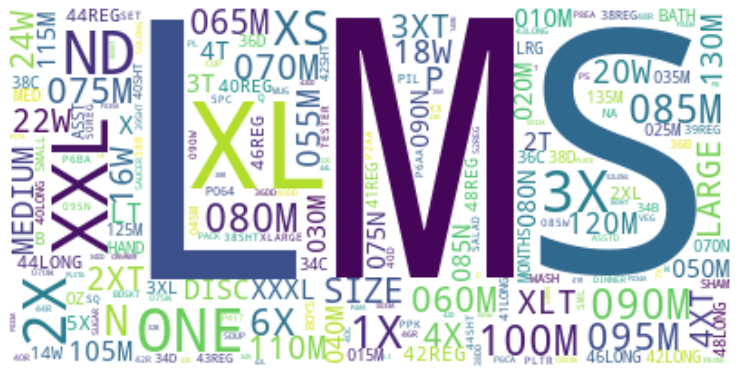

In [114]:
# Replace white spaces for underscore
text = df['SIZE'].str.replace(r' ', '_', regex=True).str.replace(r'_$','',regex=True)

# Create a single string with the color column
text = " ".join(cat for cat in df.SIZE)

# Create wordcloud
size_wc = WordCloud(collocations = False, 
                    background_color = 'white',
                   normalize_plurals = False).generate(text)

# print wordcloud
figure(figsize = (20, 6), dpi = 80)
plt.imshow(size_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

From the wordcloud we can see some expected sizes like S, M, L, XL, XXL, 3X; or 16w, 18W, 22W, for newly born clothes, 02, 04, 06, 08, 10. We also see products with more than one size (for example "PSML" for petit, small, medium and large). 

As with the color variable, we detect that further cleaning is needed if "size" will be used in the modelling part. For example, sizes can be homogeneized in one letter code or complete word (like M or MEDIUM), we could also homegeneize sizes in "weeks" or "months". 

Nevertheless, there are many sizes that do not seem normal (like "PPK" or "HAND", "YS", "Z12", "#4 TBLT RE").

If the variable will not be included in the model, it might not be worth the effort of cleanning the colors. 

#### PACK SIZE

In [69]:
# Number of different packsizes
print("\nNumber of different colors: " + str(len(df.PACKSIZE.unique())))


Number of different colors: 48


In [82]:
# Table count for PACKSIZE
df.PACKSIZE.value_counts().sort_values(ascending = False)

1      1316168
3        13822
6         7251
2         4157
4         2927
12         589
403        300
501        150
8          139
36         104
10          82
50          79
201         76
24          72
100         46
25          44
101         43
48          40
7           33
5           32
0           32
601         25
20          19
500         18
301         14
120          9
40           8
18           8
600          7
58           6
75           6
801          6
11           5
300          5
508          5
16           4
720          4
23           4
29           4
9            3
401          2
200          2
80           1
70           1
190          1
999          1
250          1
96           1
Name: PACKSIZE, dtype: int64

Text(0.5, 1.0, 'Distribution of pack size')

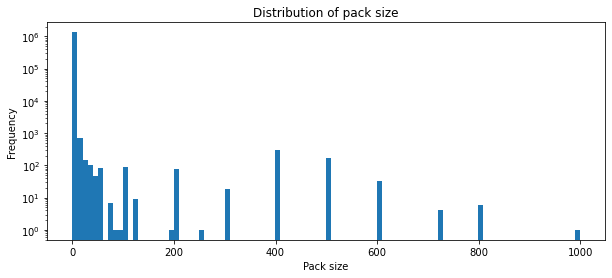

In [79]:
# Mean cost distribution 
ax = df['PACKSIZE'].plot.hist(bins = 100, log = True,
                                       figsize = (10,4))

# Customize axis 
plt.xlabel("Pack size")
plt.title("Distribution of pack size")

The most common pack size by far is one. There are also many other presentations that have several SKU associated (3,6,2,4,12). There are 32 observations with a pack size equal to zero. This seems like an error since no pack size would mean no article to sell, in the optimal case this should be consulted with the business expert to see if the zeros are a valid observation. Also there are some other package sizes that seem suspicious but are frequen (like 403, 501, 201) since they are not mulitples of 10 or any other common numbers for products. Asides from these, the variable does not present any errors.  

#### VENDOR

            SKU
VENDOR         
5715232  147944
3313116   29566
5531254   16861
3213321   12472
7045883   11990
...         ...
911910        1
5026614       1
9011195       1
5025420       1
2412767       1

[2369 rows x 1 columns]

Number of different vendors: 2369


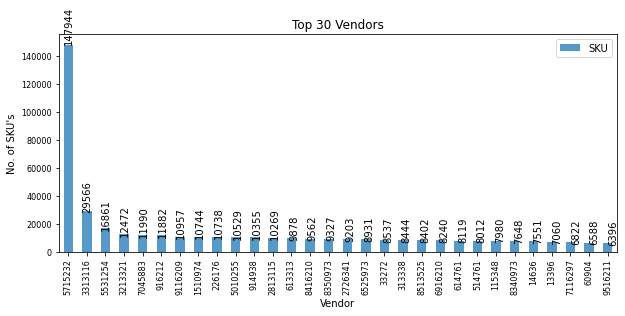

,SKU
count,2369.000000
mean,568.322499
std,3359.959872
min,1.000000
25%,8.000000
50%,44.000000
75%,288.000000
max,147944.000000


In [94]:
# Check values for Vendor
vendor_count = pd.pivot_table(df, 
                               values = 'SKU', 
                               index = 'VENDOR', 
                               aggfunc = 'count').sort_values('SKU', ascending = False)
print(vendor_count)

# Number of different Vendor id's 
print("\nNumber of different vendors: " + str(vendor_count.shape[0]))

# Bar plot TOP 30 Styles's 
ax = vendor_count.head(30).plot(kind = 'bar', rot = 90, fontsize = 8, 
                             alpha = 0.75, figsize = (10,4))
# Customize plot
plt.title("Top 30 Vendors")
plt.xlabel("Vendor")
plt.ylabel("No. of SKU's")

# Add counts on top of bars

for i in ax.patches:
    ax.annotate(str(i.get_height()), 
               (i.get_x()*1.01, i.get_height()*1.01),
               rotation = 90)

# print plot
plt.show()

# Summary statistics. 
vendor_count.describe()

There is clearly a dominant vendor in Dillards. It would be interesting to know the name of the vendor to see if it is "the brand of the house" (i.e. produced by Dillard's itself). The mean number of products for a vendor is 568 with a sd of 3,360. 50% of the vendors sell around 44 products. 

#### Brand

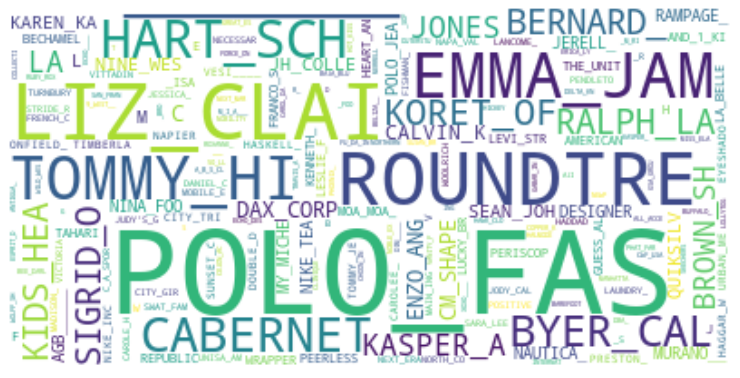

In [113]:
# Replace white spaces for underscore
text = df['BRAND'].str.replace(r' ', '_', regex=True).str.replace(r'_$','',regex=True)

# Create a single string with the brand column
text = " ".join(cat for cat in text)

# Create wordcloud
size_wc = WordCloud(collocations = False, 
                    background_color = 'white', 
                   normalize_plurals = False).generate(text)

# print wordcloud
figure(figsize = (20, 6), dpi = 80)
plt.imshow(size_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

From the wordcloud above we can see that the brands with the majority of products are POLO, FAS, LIZ, ROUNDTRE, TOMMY, CLAI, JAIM, CABERNET,KASPER, NWUTICA, BERNARD, HART. Lets see the distribution of SKU's by brand. 

              SKU
BRAND            
POLO FAS   130994
LIZ CLAI    42978
ROUNDTRE    39466
EMMA JAM    29443
TOMMY HI    25490
...           ...
BEADING         1
DORBY FR        1
UNIVSHOE        1
DUCK HOU        1
\OLO FAS        1

[1949 rows x 1 columns]

Number of different brands: 1949


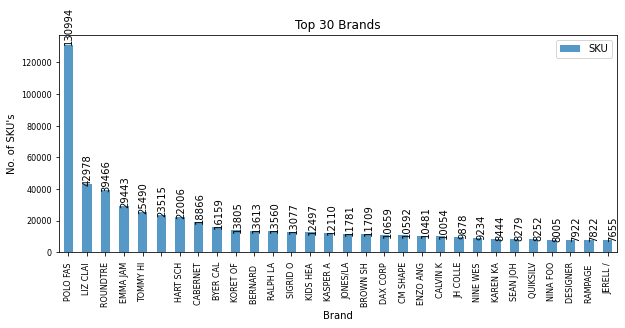

,SKU
count,1949.000000
mean,690.793227
std,3739.360162
min,1.000000
25%,8.000000
50%,48.000000
75%,291.000000
max,130994.000000


In [110]:
# Check values for Vendor
brand_count = pd.pivot_table(df, 
                               values = 'SKU', 
                               index = 'BRAND', 
                               aggfunc = 'count').sort_values('SKU', ascending = False)
print(brand_count)

# Number of different Vendor id's 
print("\nNumber of different brands: " + str(brand_count.shape[0]))

# Bar plot TOP 30 Styles's 
ax = brand_count.head(30).plot(kind = 'bar', rot = 90, fontsize = 8, 
                             alpha = 0.75, figsize = (10,4))
# Customize plot
plt.title("Top 30 Brands")
plt.xlabel("Brand")
plt.ylabel("No. of SKU's")

# Add counts on top of bars

for i in ax.patches:
    ax.annotate(str(i.get_height()), 
               (i.get_x()*1.01, i.get_height()*1.01),
               rotation = 90)

# print plot
plt.show()

# Summary statistics. 
brand_count.describe()

The brand "Polo FAS" is by far the one with the major numbr of SKU's. The mean number of SKU's by brand is 690 with a sd of 3,739. Also it is worth noting that there are 23,515 SKU's that have no brand associated. This must be an error in the database. 